1. Setup and Load Data

1.1 Install Dependencies and Setup

In [284]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [285]:
%pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
blinker                      1.8.2
cachetools                   5.4.0
certifi                      2024.7.4
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.0.1
Flask                        3.0.3
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.4.0
google-auth                  2.32.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.65.1
h5py                         3.11.0
idna                         3.7
ipyk

In [286]:
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
            os.remove(image_path)


In [287]:
import tensorflow as tf
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory(
    'data',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

data_iterator = data.as_numpy_iterator()

# Get another batch from the iterator
batch = data_iterator.next()
print(batch)


Found 582 files belonging to 2 classes.
(array([[[[250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         ...,
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ]],

        [[250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         ...,
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ]],

        [[250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         ...,
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ],
         [250.      , 250.      , 250.      ]],

        ...,

        [[156.79529 , 132.79529 ,  84.79529 ],
    

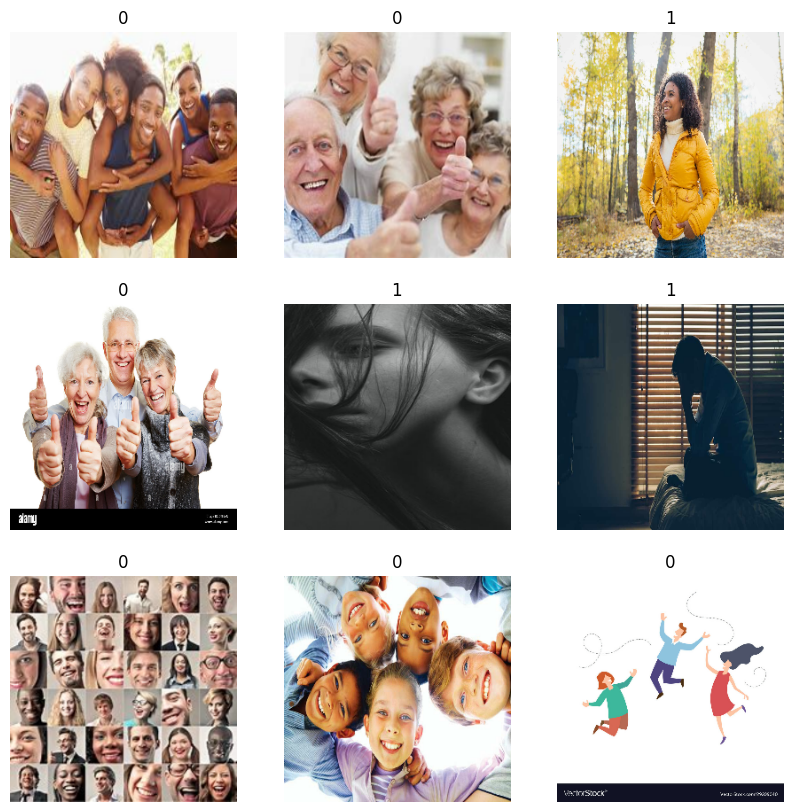

In [288]:
images, labels = batch

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")
plt.show()


In [289]:
# import tensorflow as tf
# import os

In [290]:
# os.listdir('data')

In [291]:
# gpus = tf.config.experimental.list_physical_devices('GPu')
# for gpu in gpus:
    # tf.config.experimental.set_memory_growth(gpu, True)

1.2 Remove dodgy images

In [292]:
# import cv2
# import imghdr
# from matplotlib import pyplot as plt

In [293]:
# data_dir = 'data'

In [294]:
# os.listdir(os.path.join(data_dir))

In [295]:
# os.listdir(os.path.join(data_dir,'happy'))

In [296]:
# image_exts = ['jpeg','jpg','bmp','png',]

In [297]:
# img=cv2.imread(os.path.join('data','happy','family.jpg'))

In [298]:
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [299]:
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir,image_class)):
#         image_path = os.path.join(data_dir,image_class,image)
#         try:
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts:
#                 print("Image not in ext list {}".formate(image_path))
#                 os.remove(image_path)

#         except Exception as e:
#             print("Issue with image{}".format(image_path))

1.3 Load Data

In [300]:
# tf.data.Dataset

In [301]:
# import numpy as np
# from matplotlib import pyplot as plt

In [302]:
# tf.keras.utils.image_dataset_from_directory

In [303]:
# data = tf.keras.utils.image_dataset_from_directory('data')

In [304]:
# data

In [305]:
# data_iterator = data.as_numpy_iterator()

In [306]:
# data_iterator

In [307]:
#Get another batch from the iterator
batch = data_iterator.next()

In [308]:
len(batch)

2

In [309]:
batch[0].shape

(32, 256, 256, 3)

In [310]:
# class 1 = Sad People
# class 0 = Happy People
batch[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

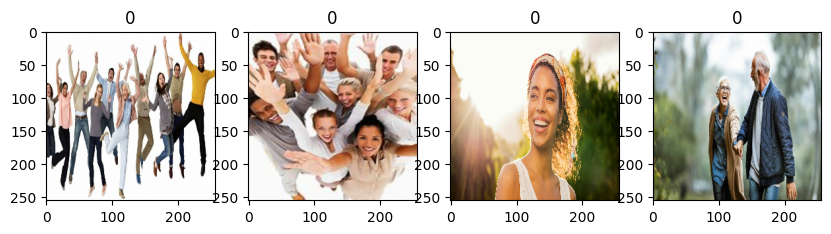

In [311]:
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [312]:
scaled = batch[0]/255

In [313]:
scaled.max()

1.0

In [314]:
scaled.min()

0.0

2. Preprocess Data

2.1 Scale Data

In [315]:
data = data.map(lambda x,y:(x/255,y))

In [358]:
scaled_iterator = data.as_numpy_iterator()

In [359]:
batch  = scaled_iterator.next()

In [360]:
batch[0].min()

0.0

In [361]:
batch[0].max()

1.0

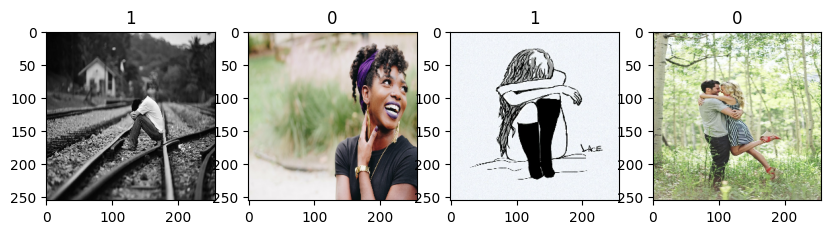

In [363]:
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [321]:
# data.as_numpy_iterator().next()[0].min()

In [322]:
# data.as_numpy_iterator().next()[0].max()

In [323]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [324]:
len(data)

19

In [325]:
print(train_size)
print(val_size)
print(test_size)

13
3
2


In [326]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [327]:
print(len(train))
print(len(val))
print(len(test))

13
3
2


3. Deep Model

3.1 Build Deep Learning Model

In [328]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [329]:
model = Sequential()

In [330]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [331]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [332]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

3.2 Train

In [333]:
logdir = 'logs'

In [334]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [335]:
hist = model.fit(train,epochs=20, validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


13/13 [==============================] - 24s 1s/step - loss: 1.1112 - accuracy: 0.5553 - val_loss: 0.6462 - val_accuracy: 0.5729
Epoch 2/20
13/13 [==============================] - 18s 1s/step - loss: 0.5846 - accuracy: 0.6755 - val_loss: 0.5715 - val_accuracy: 0.6562
Epoch 3/20
13/13 [==============================] - 17s 1s/step - loss: 0.4638 - accuracy: 0.8053 - val_loss: 0.3123 - val_accuracy: 0.8958
Epoch 4/20
13/13 [==============================] - 16s 1s/step - loss: 0.3593 - accuracy: 0.8846 - val_loss: 0.2603 - val_accuracy: 0.9271
Epoch 5/20
13/13 [==============================] - 16s 1s/step - loss: 0.2730 - accuracy: 0.8966 - val_loss: 0.2267 - val_accuracy: 0.9375
Epoch 6/20
13/13 [==============================] - 16s 1s/step - loss: 0.1837 - accuracy: 0.9447 - val_loss: 0.2075 - val_accuracy: 0.8958
Epoch 7/20
13/13 [==============================] - 16s 1s/step - loss: 0.1523 - accuracy: 0.9399 - val_loss: 0.1551 - val_accuracy: 0.9479
Epoch 8/20
13/13 [=============

In [336]:
hist.history

{'loss': [1.1112209558486938,
  0.5846002101898193,
  0.46377041935920715,
  0.35933172702789307,
  0.272970974445343,
  0.18370136618614197,
  0.15227676928043365,
  0.13086570799350739,
  0.13918569684028625,
  0.11274198442697525,
  0.08846497535705566,
  0.06240496411919594,
  0.05874543637037277,
  0.026094235479831696,
  0.029569612815976143,
  0.02635948173701763,
  0.03891512006521225,
  0.029188642278313637,
  0.009440057910978794,
  0.008377180434763432],
 'accuracy': [0.5552884340286255,
  0.6754807829856873,
  0.8052884340286255,
  0.8846153616905212,
  0.8966346383094788,
  0.9447115659713745,
  0.9399038553237915,
  0.9519230723381042,
  0.9495192170143127,
  0.9615384340286255,
  0.96875,
  0.9807692170143127,
  0.9855769276618958,
  0.995192289352417,
  0.9879807829856873,
  0.9927884340286255,
  0.9807692170143127,
  0.9927884340286255,
  1.0,
  0.9975961446762085],
 'val_loss': [0.6461560726165771,
  0.5715237259864807,
  0.3123410642147064,
  0.26031139492988586,
  0

3.3 Plot Performance

<function matplotlib.pyplot.show(close=None, block=None)>

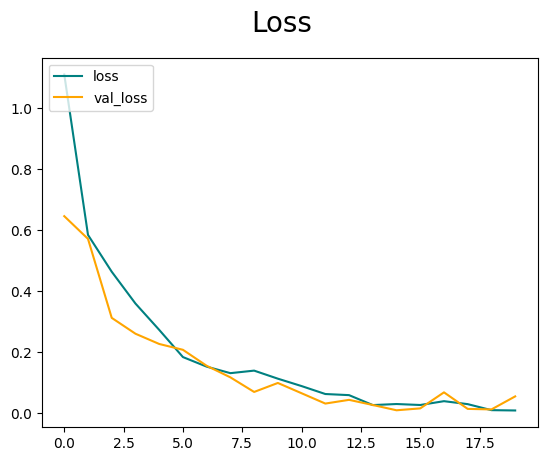

In [337]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

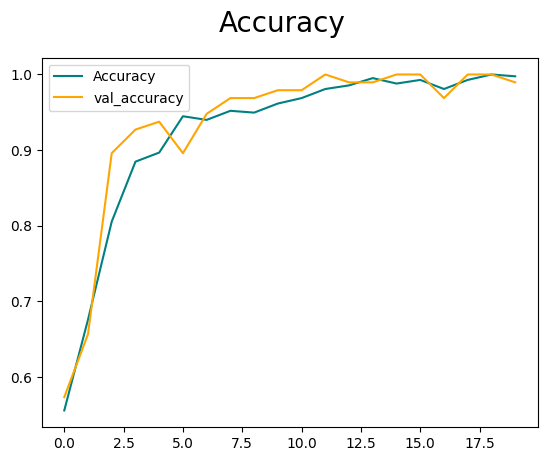

In [338]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show

4. Ecaluate Performance

4.1 Evaluate

In [339]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [340]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [341]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 141ms/step


In [342]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accurcy: {acc.result().numpy()}')

Precision: 0.9642857313156128, Recall: 1.0, Accurcy: 0.984375


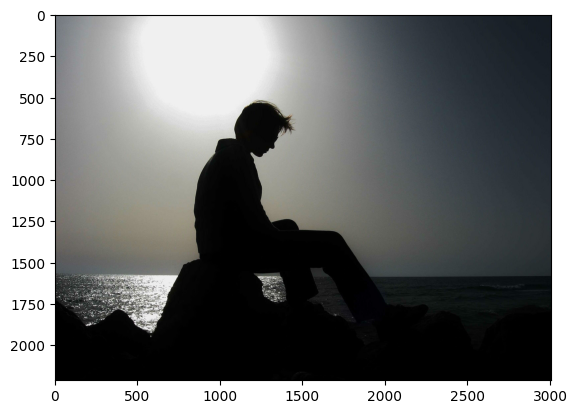

In [383]:
img = cv2.imread("data/sad/504212.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

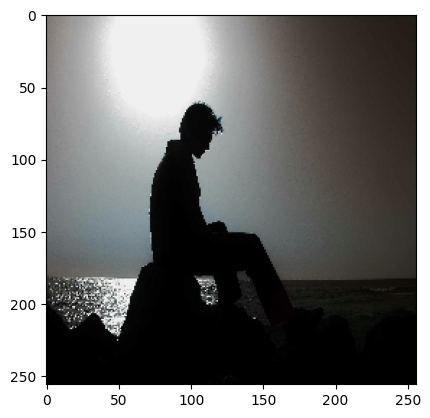

In [384]:
# Resize the image
resize = tf.image.resize(img, (256, 256))

# Display the resized image
plt.imshow(resize.numpy().astype(int))

plt.show()

In [385]:
resize.shape

TensorShape([256, 256, 3])

In [386]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [387]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 32ms/step


In [388]:
yhat

array([[0.9999608]], dtype=float32)

In [389]:
if yhat > 0.5:
    print(f'Predcted class is sad')
else:
    print(f'Predicted class is Happy')

Predcted class is sad


5. Save the Model

5.1 Save the Model

In [390]:
from tensorflow.keras.models import load_model

In [391]:
model.save(os.path.join('models','happysadmodel.h5'))

In [392]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [393]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 84ms/step


In [395]:
if yhatnew > 0.5:
    print(f'Predcted class is sad')
else:
    print(f'Predicted class is Happy')

Predcted class is sad
